# [Py4Hw User Guide](../UserGuide.ipynb)> 1.4 Logic
###  [Next: 1.5 Ports](Ports.ipynb)

All Logic blocks inherit from the class Logic.
When you create a Hardware block you must create a class inheriting from Logic.
Each object must have a parent and a name. This is implemented in the base class, so the constructor of your block must call the base class's constructor with parent and name.

<pre>
    super().__init__(parent, name)
</pre>

Logic class has the following member variables (AKA fields)
 
|Field |Description |
| :-- | :-- |
| parent | The parent circuit of this circuit. It must be also an object derived from the Logic class, except fot the HWSystem object, which parent is None |
| name | An string with the name of the object. This name must be unique among the parent's children |
| inPorts | A list with the input ports of the circuit |
| outPorts | A list with the output ports of the circuit |
| sources | A list with the interface sources of the circuit |
| sinks | A list with the interface sinks of the circuit |
| children | A dictionary (indexed by name) of the child instances of the circuit |
| clockDriver | The clock driver of the circuit. By default is None, meaning that the ClockDriver is inherited from the parent |
| _wires | A dictionary (indexed by name) of the internal wires of the circuit |


And it has the following member functions (methods).

|Method |Description |
| :-- | :-- |
| __init__ | Constructor of the class |
| addIn | Adds an input port |
| addOut | Adds an output port |
| getInPortByName | Retrieves an input port by its name. This is needed because ports are stored in a list |
| getOutPortByName | Retrieves an output port by its name. This is needed because ports are stored in a list |
| reconnectIn | Connects an input port with a wire |
| addInterfaceSource | Adds the  ports of the source interface to the circuit |
| addInterfaceSink | Adds the  ports of the sink interface to the circuit |
| appendWire | add wire to internal wires |
| wire | create a wire |
| wires | create multiple wires |
| allLeaves | Obtains all leaf descendants of this circuit |
| isPropagatable | Indicates if the circuit implements the propagate function |
| isClockable | Indicates if the circuit implements the clock function |
| isPrimitive | Indicates if it is either clockable or propagatable |
| isStructural | Indicates if it has descendants |
| getFullPath | Gets the full of a hierarchy element |
| getFromFullPath | Gets a Logic from the full path |


Here you can see an example of creating a class to implement an integrator

In [9]:
import py4hw

class Integrator(py4hw.Logic):
    def __init__(self, parent:py4hw.Logic, name:str, a:py4hw.Wire, r:py4hw.Wire):
        super().__init__(parent, name)
        
        self.addIn('a', a)
        self.addOut('r', r)
        
        sum = self.wire('sum', a.getWidth())
        py4hw.Add(self, 'sum', a, r, sum)
        py4hw.Reg(self, 'r', sum, r)

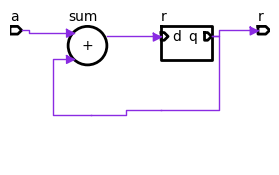

In [11]:
hw = py4hw.HWSystem()

a = hw.wire('a', 8)
r = hw.wire('r', 8)

py4hw.Sequence(hw, 'a', [1,2,3,4,5], a)
Integrator(hw, 'integrator', a, r)

sch = py4hw.Schematic(hw.children['integrator'])

sch.draw()